- top 2 best filling methods 
- apply to all 4 grid sizes 
- ds to 12 
- dx to 12
- > use in ML to compete with edem

In [1]:
from glob import glob

In [3]:
# solve the epsg code problem 
xdem_path ='/media/ljp238/12TBWolf/RSPROX/TILES30/RESAMPLE/N09E105/N09E105_tdem_DEM__Fw.tif'
tdem_path ='/media/ljp238/12TBWolf/RSPROX/TILES30/RESAMPLE/N09E105/N09E105_tdem_DEM.tif'
edem_path ='/media/ljp238/12TBWolf/RSPROX/TILES30/RESAMPLE/N09E105/N09E105_edem_W84.tif'

In [ ]:
xdem_path,tdem_path,edem_path
# read dem, and set null from metadata to np.nan 
# any value less than -99 to nan or any value greater than 2000
# plot them 3 dem, in 3cols1row, each with their own colormap, vmin,vmax, 10and90thpercetinle

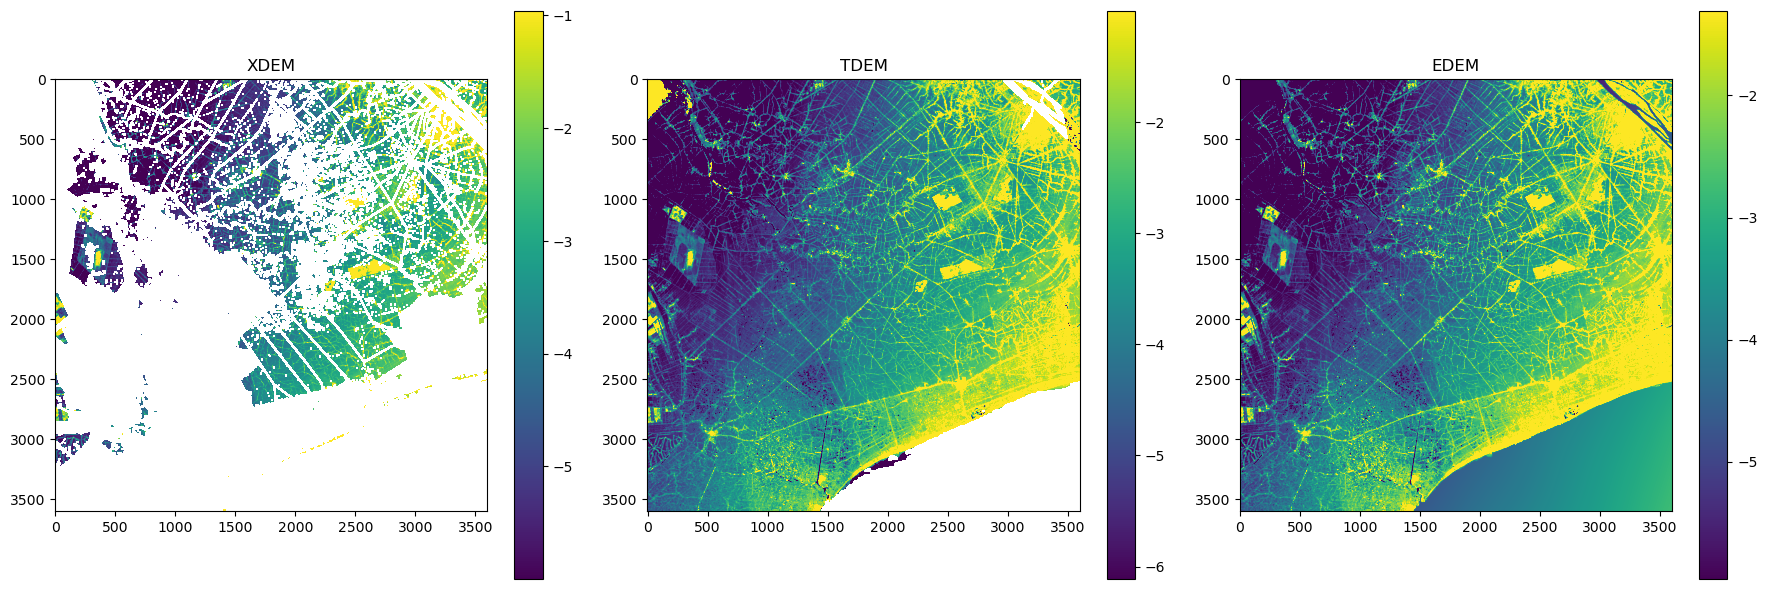

In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Function to read and process DEM data
def read_and_process_dem(dem_path):
    with rasterio.open(dem_path) as src:
        dem_data = src.read(1)  # Read the first band (assuming it's single-band)
        nodata_value = src.nodata  # Get the NoData value from metadata

        # Set NoData value to np.nan
        if nodata_value is not None:
            dem_data = np.where(dem_data == nodata_value, np.nan, dem_data)

        # Set values less than -99 or greater than 2000 to np.nan
        dem_data = np.where((dem_data < -99) | (dem_data > 2000), np.nan, dem_data)

    return dem_data

# Function to plot DEMs
def plot_dems(dem_data_list, titles):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for idx, dem_data in enumerate(dem_data_list):
        # Compute 10th and 90th percentiles for vmin and vmax
        vmin, vmax = np.percentile(dem_data[~np.isnan(dem_data)], [10, 90])

        # Plot each DEM with its own colormap
        im = axs[idx].imshow(dem_data, cmap='viridis', vmin=vmin, vmax=vmax)#terrain
        axs[idx].set_title(titles[idx])
        fig.colorbar(im, ax=axs[idx], orientation='vertical')

    plt.tight_layout()
    plt.show()


# Read and process the DEMs
xdem_data = read_and_process_dem(xdem_path)
tdem_data = read_and_process_dem(tdem_path)
edem_data = read_and_process_dem(edem_path)

# Plot the DEMs
plot_dems([xdem_data, tdem_data, edem_data], ['XDEM', 'TDEM', 'EDEM'])


https://matplotlib.org/stable/users/explain/colors/colormaps.html
- 'terrain''gist_earth', : make them not end in white color
- , viridis,turbo
- qualitatives ones too

In [1]:
import os
import cv2
import time
import pandas as pd
from glob import glob
from concurrent.futures import ProcessPoolExecutor
from vfill import write_raster, opencv,load_data_obj, split_data_and_mask,fill_rasterio

In [14]:
from upaths import RSPROX_DPATH

In [15]:
grid = 30 
vill_dpath = f"{RSPROX_DPATH}/DEMVFILL/GRID{grid}/"
xdem_pattern =f'{RSPROX_DPATH}/TILES{grid}/RESAMPLE/*/*Fw.tif'
xdem_files = glob(xdem_pattern); print(len(xdem_files))

17


TELEA

In [5]:
method = 'TELEA'
except_telea = []
files = xdem_files
mth = method
for i,fipath in enumerate(files):
    if i > 0: break
    tilename = os.path.basename(fipath).split('_')[0]
    
    fo_dpath = os.path.join(vill_dpath,tilename)
    os.makedirs(fo_dpath, exist_ok=True)
    fopath = os.path.join(fo_dpath, os.path.basename(fipath).replace('.tif', f'__{mth}.tif'))
    print(tilename,fopath)
    try:
        src,data = load_data_obj(fipath)
        data, mask = split_data_and_mask(data,src)
        data_res = opencv(data, cv2.INPAINT_TELEA)
        write_raster(fopath, data_res, fipath)
    except ValueError:
        print(fipath)
        except_telea.append(fipath)

## telea works a bit better for patch than tile. tile is really bad 

N09E105 /media/ljp238/12TBWolf/RSPROX/DEMVFILL/GRID30/N09E105/N09E105_tdem_DEM__Fw__TELEA.tif


NS

In [6]:
method = 'NS'
except_telea = []
files = xdem_files
mth = method
for i,fipath in enumerate(files):
    if i > 0: break
    tilename = os.path.basename(fipath).split('_')[0]
    
    fo_dpath = os.path.join(vill_dpath,tilename)
    os.makedirs(fo_dpath, exist_ok=True)
    fopath = os.path.join(fo_dpath, os.path.basename(fipath).replace('.tif', f'__{mth}.tif'))
    print(tilename,fopath)
    try:
        src,data = load_data_obj(fipath)
        data, mask = split_data_and_mask(data,src)
        data_res = opencv(data, cv2.INPAINT_NS)
        write_raster(fopath, data_res, fipath)
    except ValueError:
        print(fipath)
        except_telea.append(fipath)

## viza suggest that NS is better than TELEA vizually
## would be interesting to compare it numerically 

N09E105 /media/ljp238/12TBWolf/RSPROX/DEMVFILL/GRID30/N09E105/N09E105_tdem_DEM__Fw__NS.tif


ROIFILL

In [8]:
# method = 'RIO'
# siter = 0
# except_telea = []
# files = xdem_files
# mth = method
# for i,fipath in enumerate(files):
#     if i > 0: break
#     tilename = os.path.basename(fipath).split('_')[0]
    
#     fo_dpath = os.path.join(vill_dpath,tilename)
#     os.makedirs(fo_dpath, exist_ok=True)
#     fopath = os.path.join(fo_dpath, os.path.basename(fipath).replace('.tif', f'__{mth}.tif'))
#     print(tilename,fopath)
#     try:
#         src,data = load_data_obj(fipath)
#         data, mask = split_data_and_mask(data,src)
#         #data_res = opencv(data, cv2.INPAINT_NS)
#         if mth == 'RIO':
#             data_res = fill_rasterio(data,si=siter)
#             fopath = fopath.replace('.tif', f'_{siter}.tif')
#         write_raster(fopath, data_res, fipath)
#     except ValueError:
#         print(fipath)
#         except_telea.append(fipath)

## rio doing well, but oversmoothing just like telea in comparison to edem

In [ ]:
def riofiller_inpaint(fipath, fopath, siter=0):
    fopath = fopath.replace('.tif', f'_{siter}.tif')
    if not os.path.isfile(fopath):
        src,data = load_data_obj(fipath)
        data, mask = split_data_and_mask(data,src)
        data_res = fill_rasterio(data,si=siter)
    
        write_raster(fopath, data_res, fipath)
    

In [12]:
method = 'RIO'
siter = 0
except_telea = []
files = xdem_files
mth = method
for i,fipath in enumerate(files):
    tilename = os.path.basename(fipath).split('_')[0]
    
    fo_dpath = os.path.join(vill_dpath,tilename)
    os.makedirs(fo_dpath, exist_ok=True)
    fopath = os.path.join(fo_dpath, os.path.basename(fipath).replace('.tif', f'__{mth}.tif'))
    print(tilename,fopath)
    try:
        src,data = load_data_obj(fipath)
        data, mask = split_data_and_mask(data,src)
        #data_res = opencv(data, cv2.INPAINT_NS)
        if mth == 'RIO':
            data_res = fill_rasterio(data,si=siter)
            fopath = fopath.replace('.tif', f'_{siter}.tif')
        write_raster(fopath, data_res, fipath)
    except ValueError:
        print(fipath)
        except_telea.append(fipath)

All the others too expensive to run on TILE so patch 

Fidning optimal patchsize to hard, so tried, 
- 256, 
- 2x256, 
- 4x256

merge and then compare

Biharmonic